# Leafsnap Project - step by step analysis

## DataSet: LeafSnap (http://leafsnap.com/dataset/)

### To promote further research in leaf recognition, Leafsnap released the Leafsnap dataset, which consists of images of leaves taken from two different sources, as well as their automatically-generated segmentations:<br>

1) 23147 Lab images, consisting of high-quality images taken of pressed leaves, from the Smithsonian collection. These images appear in controlled backlit and front-lit versions, with atleast 200 images per species.<br><br>
2) 7719 Field images, consisting of "typical" images taken by mobile devices (iPhones mostly) in outdoor environments. These images contain varying amounts of blur, noise, illumination patterns, shadows, etc.<br>

### The dataset currently covers all 185 tree species from the Northeastern United States.<br>

## Main Issue Related to DataSet

1) In general, it is considered as for Deep learning like CNN, we need atleast dataset of size 1000 - 500 per class for proper classification. But leafsnap dataset has size of 200 images per class which is very as less for classification.<br> <b> Solution: </b> to solve this issue, we used data argumentation techique<br>

2) Most of the tree leaves have similar kind of shape and color. Due to this problem, we need more different size filters and complex deep network to identify exact class of leaves. <br> <b> Solution: </b> to solve this issue, we performed experiment over different CNN network architecture like Lenet, Vgg, AlexNet and GoogleInceptionMini. We will provide final classification using combined result of all the models.

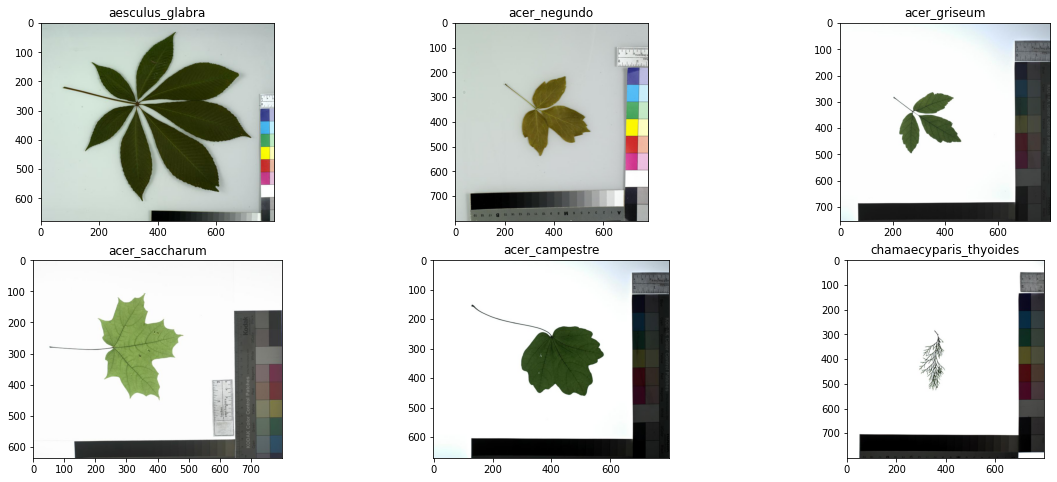

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

basePath = "leafsnap-dataset/dataset/images/lab/"

imagePath = {"chamaecyparis_thyoides/wb1409-09-4.jpg", "aesculus_glabra/ny1158-10-1.jpg",
            "acer_campestre/ny1079-01-4.jpg","acer_griseum/ny1010-03-4.jpg", "acer_negundo/pi2025-01-2.jpg"
             ,"acer_saccharum/pi0029-03-4.jpg"}


fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for index, image in enumerate(imagePath):
    ax  = fig.add_subplot(2, 3, index+1)
    class_img = image.split('/')[0]
    ax.title.set_text(class_img)
    img = mpimg.imread(f'{basePath}{image}')
    ax.imshow(img)    

In above example you can see that first two leaves are looking different than other four acer species leaves. If you focus more, you can see acer_negundo and acer_griseum looks alike, even for the human eyes it is diffcult to find the difference. This project is going to be tough one and will push us to learn more.

## Resources

All the resource like classification report, plots and validation error json file exist in folder with model architecture names

## Data Argumentation

Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.

Data augmentation is a type of regularization technique that operates on the training data. As the
name suggests, data augmentation randomly jitters our training data by applying a series of random
translations, rotations, shears, and flips. Applying these simple transformations does not change the
class label of the input image; however, each augmented image can be considered a “new” image
that the training algorithm has not seen before. Therefore, our training algorithm is being constantly
presented with new training samples, allowing it to learn more robust and discriminative patterns.
As our results demonstrated, applying data augmentation increased our classification accuracy
while helping mitigate the effects of overfitting. Furthermore, data augmentation also allowed us
to train a Convolutional Neural Network on only 60 samples per class, far below the suggested
1,000-5,000 samples per class.

## Performance Analysis of Lenet Architecture on LeafSnap

Lenet is the oldest Architecture in CNN that uses tanh as activation function rather than most popular relu. The final model will be big in size and performance cannot guaranted. So,below is the performance analysis of lenet on leafsnap field images rather than lab data because we are looking for a candidate which can perform good on small field data than we can select best for further training on lab data.

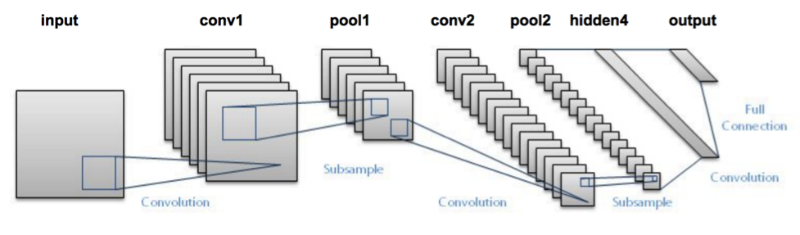

### Performance Analysis of Lenet with or without Data Argumentation

In [2]:
from IPython.display import HTML, display
display(HTML(f"<table><tr><td><img src='LeafSnap_Lenet/plot_Lenet_without_data_argumentation.png'></td><td><img src='LeafSnap_Lenet/plot_Lenet_with_data_argumentation.png'></td></tr></table>"))

,


Above Lenet training had done over leaf snap field data using 100 epochs. First Image is training without Data Argumentation and second with data argumentation. You can visualize here that In first graph validataion loss is going in different direction than the train loss which is sign of overfitting. This training is worthless as model will not be able to classify leaves properly. 

But, In second figure we can see that train loss didn't dropped immediately and validation loss is following the same path as training loss. But after 40 epoch we can see that validation loss started changing paths which means in further epochs the model will be overfit. 

After 60 epochs the accuracy curve is stop raising which could be sign that model stopped learning or learning very slowly. Now let jump on Vgg performance to see how that network performed on our dataset. 

<br><b> Overall precision of the Lenet without Data Argumentation after 100 epoch is 0.591968911917098 and recall is 0.591968911917098</b>

<br><b> Overall precision of the Lenet with Data Argumentation after 100 epoch is 0.643782383419689 and recall is 0.643782383419689</b>	

## Performance Analysis of Vgg Architecture on LeafSnap

VGGNet consists of two sets of CONV => RELU => CONV => RELU => POOL layers, followed by a set of FC => RELU => FC => SOFTMAX layers. The first two CONV layers will learn 32 filters, each of size 3 × 3. The second two CONV layers will learn 64 filters, again, each of size 3 × 3. Our POOL layers will perform max pooling over a 2 × 2 window with a 2 × 2 stride. We’ll also be inserting batch normalization layers after the activations along with dropout layers (DO) after the POOL and FC layers. 

Best part about VGG is that it is using a combination of dropout and batch normalization which increases the speed of training as well as work as regularization techique which help model to learn more and avoid overfitting.

[source: Deep learning for computer vision with python by adrian rosebrock]

### Performance Analysis of VGG with or without Data Argumentation

In [3]:
from IPython.display import HTML, display
display(HTML(f"<table><tr><td><img src='LeafSnap_VGG/plot_Vgg_without_data_argumentation.png'></td><td><img src='LeafSnap_VGG/plot_Vgg_with_data_argumentation.png'></td></tr></table>"))

,


### Performance Analysis of Alexnet with or without Data Argumentation

In [4]:
from IPython.display import HTML, display
display(HTML(f"<table><tr><td><img src='LeafSnap_AlexNet/plot_AlexNet_without_data_argumentation.png'></td><td><img src='LeafSnap_AlexNet/plot_AlexNet_with_data_argumentation.png'></td></tr></table>"))

,


<b> Note 1: From above analysis, we are atleast clear that dataArgumentation will be the best choice to train CNN which give us good performance and accuracy. So, from now we will use DataArgumentation in all further model Architecture</b>

### Performance Analysis of GoogleMininception on LeafSnap field dataset

Micro-architectures are small building blocks designed by deep learning practitioners to enable networks to learn (1) faster and (2) more efficiently, all while increasing network depth. These micro-architecture building blocks are stacked, along with conventional layer types such as CONV, POOL, etc., to form the overall macro architecture.Inside the Inception module, we learn all three 5 × 5, 3 × 3, and 1 × 1 filters (computing them in parallel)concatenating the resulting feature maps along the channel dimension. The next layer in the GoogLeNet architecture (which could be another Inception module) receives these concatenated, mixed filters and performs the same process. Taken as a whole, this process enables GoogLeNet to learn both local features via smaller convolutions and abstracted features with larger convolutions – we don’t have to sacrifice our level of abstraction at the expense of smaller features

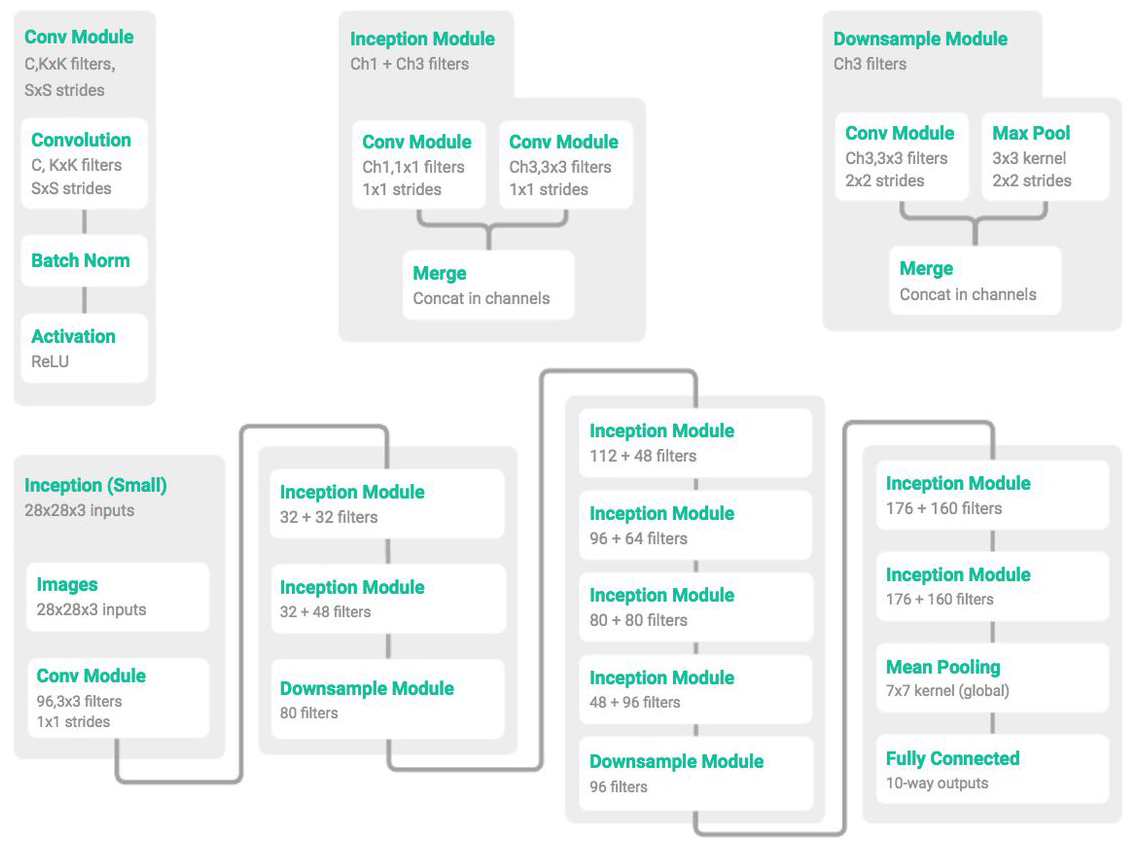

[source: Deep learning for computer vision with python by adrian rosebrock]

In [5]:
from IPython.display import HTML, display
display(HTML(f"<table><tr><td><img src='Inception_cnn/Inception_mini_google_on_lab_images/Inception_model_on_field_data/Inception_100_fig.png'></td</tr></table>"))

From figure it is clear that GoogleMininception working nicely over dataset. Initial variation in val loss shows that model is learning. Validation loss flowing the same path as train loss which showing that model is not getting overfit. At the same time training and validation accuracy is also increasing.

<b> Note 2: As per above experiment we arrived at best CNN architecture which can perform better in leafsnap dataset classification </b>

### Performance Analysis of GoogleMininception on LeafSnap lab dataset using SGD

Lab dataset is large dataset than field dataset . We used same 100 epoch to observe its performance, learning capacity with increasing dataset. But still we don't have much data hence we are using data argumentation to increase performance. 

In [6]:
from IPython.display import HTML, display
display(HTML(f"<table><tr><td><img src='Inception_cnn/Inception_mini_google_on_lab_images/Inception_model_on_lab_data/Inception_100_fig_lab_sgd.png'></td</tr></table>"))

From graph its clear that we get more accuracy on validation data than using field data. But at the same time variation in validation loss is high then train loss. As both following data mean we are not in the situation of overfitting may be we need more epoch to train our model.

<b> precision and recall is 0.986177105831534 and 0.986177105831534 </b>


### Performance Analysis of GoogleMininception on LeafSnap lab dataset using adam

In [7]:
from IPython.display import HTML, display
display(HTML(f"<table><tr><td><img src='Inception_cnn/Inception_mini_google_on_lab_images/Inception_model_on_lab_adam/Inception_100_fig_lab_adam.png'></td</tr></table>"))

From graph, After initial fluctuation, val loss fluctuation starts decreasing and accuracy also increasing which means adam optimizer working best in this situtation.

<b>precision and recall is  0.99438444924406 and 0.99438444924406</b>

<b> Note 3: We also observed that out of SGD and adam optimizer. Adam is working better and taking less time to train the model over SGD.

### Performance Analysis on unseen data. 
As our first model is trained on lab dataset. These images appear in controlled backlit and front-lit versions, with atleast 200 images per species. Second model is trained on field data. Hence, for second model lab data is unseen data. We will make our next strategy on the basis of this experiment. 

<b> Note 4: from above experiment it is clear that model trained on lab data will perform bad on unseen data like field data. We are clear now that we need data in exactly same format or enivorment like trained data </b>

Using TensorFlow backend.


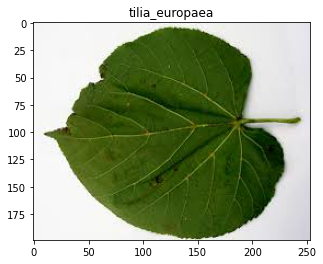

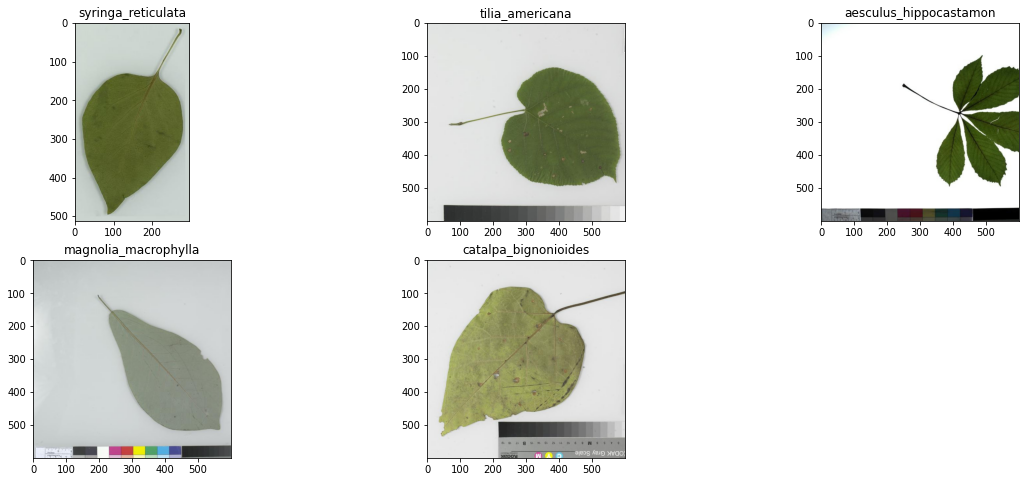

In [8]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imageProcessing.ImageToArrayPreprocessor import ImageToArrayPreprocessor
from imageProcessing.SimpleDatasetLoader import SimpleDatasetLoader
from imageProcessing.aspectawarepreprocessor import AspectAwarePreprocessor
from keras.models import load_model
import pandas as pd
import cv2
from keras.preprocessing.image import img_to_array
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


imagePaths = list()
label = list()
labels = list()
classes = ["abies_concolor","abies_nordmanniana","acer_campestre","acer_ginnala","acer_griseum","acer_negundo","acer_palmatum",
"acer_pensylvanicum","acer_platanoides","acer_pseudoplatanus","acer_rubrum","acer_saccharinum","acer_saccharum",
"aesculus_flava","aesculus_glabra","aesculus_hippocastamon","aesculus_pavi","ailanthus_altissima","albizia_julibrissin",
"amelanchier_arborea","amelanchier_canadensis","amelanchier_laevis","asimina_triloba","betula_alleghaniensis","betula_jacqemontii",
"betula_lenta","betula_nigra","betula_populifolia","broussonettia_papyrifera","carpinus_betulus","carpinus_caroliniana",
"carya_cordiformis","carya_glabra","carya_ovata","carya_tomentosa","castanea_dentata","catalpa_bignonioides",
"catalpa_speciosa","cedrus_atlantica","cedrus_deodara","cedrus_libani","celtis_occidentalis","celtis_tenuifolia",
"cercidiphyllum_japonicum","cercis_canadensis","chamaecyparis_pisifera","chamaecyparis_thyoides","chionanthus_retusus","chionanthus_virginicus",
"cladrastis_lutea","cornus_florida","cornus_kousa","cornus_mas","corylus_colurna","crataegus_crus-galli","crataegus_laevigata",
"crataegus_phaenopyrum","crataegus_pruinosa","crataegus_viridis","cryptomeria_japonica","diospyros_virginiana",
"eucommia_ulmoides","evodia_daniellii","fagus_grandifolia","ficus_carica","fraxinus_americana","fraxinus_nigra","fraxinus_pennsylvanica","ginkgo_biloba","gleditsia_triacanthos",
"gymnocladus_dioicus","halesia_tetraptera","ilex_opaca","juglans_cinerea","juglans_nigra","juniperus_virginiana","koelreuteria_paniculata","larix_decidua","liquidambar_styraciflua","liriodendron_tulipifera",
"maclura_pomifera","magnolia_acuminata","magnolia_denudata","magnolia_grandiflora","magnolia_macrophylla","magnolia_soulangiana",
"magnolia_stellata","magnolia_tripetala","magnolia_virginiana","malus_angustifolia","malus_baccata","malus_coronaria",
"malus_floribunda","malus_hupehensis","malus_pumila","metasequoia_glyptostroboides","morus_alba","morus_rubra","nyssa_sylvatica",
"ostrya_virginiana","oxydendrum_arboreum","paulownia_tomentosa","phellodendron_amurense","picea_abies","picea_orientalis","picea_pungens","pinus_bungeana","pinus_cembra","pinus_densiflora","pinus_echinata",
"pinus_flexilis","pinus_koraiensis","pinus_nigra","pinus_parviflora","pinus_peucea","pinus_pungens","pinus_resinosa","pinus_rigida",
"pinus_strobus","pinus_sylvestris","pinus_taeda","pinus_thunbergii","pinus_virginiana","pinus_wallichiana",
"platanus_acerifolia","platanus_occidentalis","populus_deltoides","populus_grandidentata","populus_tremuloides",
"prunus_pensylvanica","prunus_sargentii","prunus_serotina","prunus_serrulata","prunus_subhirtella","prunus_virginiana",
"prunus_yedoensis","pseudolarix_amabilis","ptelea_trifoliata","pyrus_calleryana","quercus_acutissima","quercus_alba",
"quercus_bicolor","quercus_cerris","quercus_coccinea","quercus_falcata","quercus_imbricaria","quercus_macrocarpa",
"quercus_marilandica","quercus_michauxii","quercus_montana","quercus_muehlenbergii","quercus_nigra","quercus_palustris",
"quercus_phellos","quercus_robur","quercus_rubra","quercus_shumardii","quercus_stellata","quercus_velutina","quercus_virginiana",
"robinia_pseudo-acacia","salix_babylonica","salix_caroliniana","salix_matsudana","salix_nigra","sassafras_albidum",
"staphylea_trifolia","stewartia_pseudocamellia","styrax_japonica","styrax_obassia","syringa_reticulata",
"taxodium_distichum","tilia_americana","tilia_cordata","tilia_europaea","tilia_tomentosa","toona_sinensis",
"tsuga_canadensis","ulmus_americana","ulmus_glabra","ulmus_parvifolia","ulmus_procera","ulmus_pumila","ulmus_rubra","zelkova_serrata"]



# Intialize Preprocessor for image

imagePath='test_leaf/tilia_europaea/tilia_europaea.jpeg'
image = cv2.imread(imagePath)
org_img  =  image
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (64, 64))
image = img_to_array(image)
image = np.array(image) / 255.0
org_label = imagePath.split(os.path.sep)[-2]
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
# load model
model = load_model("Inception_cnn/Inception_mini_google_on_lab_images/Inception_model_on_lab_adam/Inception_model_100_lab_adam.hdf5")
preds = np.argmax(model.predict(image))


plt.title(org_label)
img = mpimg.imread(imagePath)
plt.imshow(img)


classes_array = np.array(classes)

imagePaths = list()
pred_class = list()
for pred in classes_array[np.argsort(model.predict(image))[0][-5:]][::-1]:
    imagePaths.append(f"mobile_leaf/{pred}.jpeg")
    pred_class.append(pred)
    

    
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for index, image in enumerate(imagePaths):
    ax  = fig.add_subplot(2, 3, index+1)
    ax.title.set_text(pred_class[index])
    img = mpimg.imread(image)
    ax.imshow(img)    



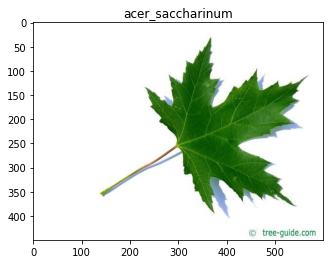

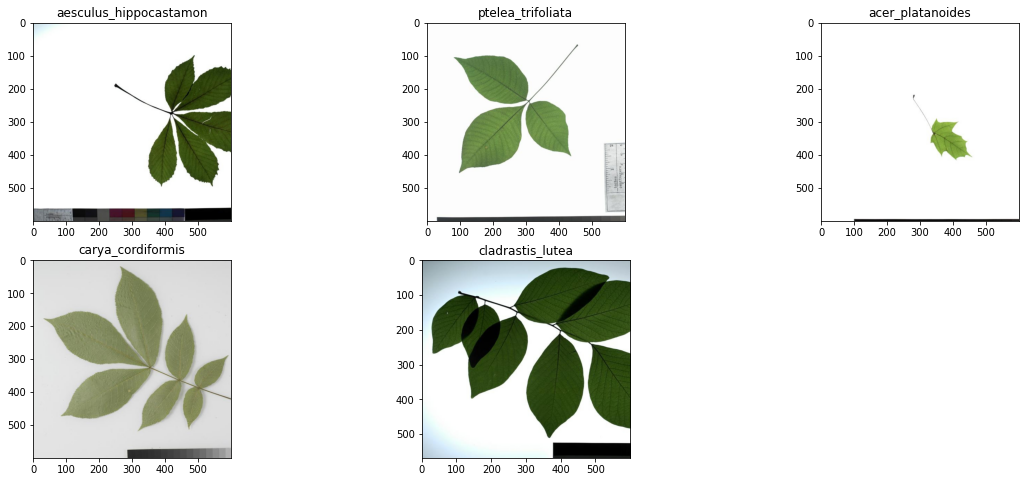

In [9]:
imagePath='test_leaf/acer_saccharinum/silver-maple-leaf.jpg'
image = cv2.imread(imagePath)
org_img  =  image
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (64, 64))
image = img_to_array(image)
image = np.array(image) / 255.0
org_label = imagePath.split(os.path.sep)[-2]
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
# load model
model = load_model("Inception_cnn/Inception_mini_google_on_lab_images/Inception_model_on_lab_adam/Inception_model_100_lab_adam.hdf5")
preds = np.argmax(model.predict(image))


plt.title(org_label)
img = mpimg.imread(imagePath)
plt.imshow(img)


classes_array = np.array(classes)

imagePaths = list()
pred_class = list()
for pred in classes_array[np.argsort(model.predict(image))[0][-5:]][::-1]:
    imagePaths.append(f"/home/devpc/Downloads/mobile_leaf/{pred}.jpeg")
    pred_class.append(pred)
    
    
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for index, image in enumerate(imagePaths):
    ax  = fig.add_subplot(2, 3, index+1)
    ax.title.set_text(pred_class[index])
    img = mpimg.imread(image)
    ax.imshow(img)  

As we can see that model performed well on testing as well as validation data. But on unseen data top predict class is not similar to original class. But we are getting orginial class in top 5 predicted classes. As of now, we are on right path which create base line for future work.

## Future Work

1) We will try to use more deep inception architecture like Inception-V3 and more.<br>
2) Try to train model on higher resolution images to see whether this make a difference or not. Currently, we are using 64 X 64 resolution images for model training due to which much information is lost.<br>
3) We will create Android Mobile Application.